In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
#load dataset
data = pd.read_csv("frauddata.csv")


In [23]:
# Taking half data.
shuffled_data = data.sample(frac=1, random_state=42)
dataset = shuffled_data.head(200000)

In [24]:
# Checking if there is any missing values in row wise
# Sorting misisng values in rows in decending order
dataset.isnull().sum(axis=1).sort_values(ascending=False)

448128     0
598550     0
1011606    0
649603     0
502482     0
          ..
171287     0
497852     0
904492     0
150526     0
616918     0
Length: 200000, dtype: int64

In [ ]:
#Checking if there are any missing values in rows
dataset.isnull().any(axis=1)

280055    False
87117     False
97681     False
332211    False
151035    False
          ...  
234496    False
248193    False
279882    False
280433    False
15182     False
Length: 200000, dtype: bool

In [ ]:
#Checking if the row having missing values grater than 100
dataset[dataset.isnull().sum(axis=1) > 100]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [25]:
# Checking if there is any missing values columns wise
# Checking  any missing values in columns

x = dataset.isnull().sum()
y = (dataset.isnull().sum()/dataset.shape[0])*100
z = {'Total number of missing values':x,'Percentage of missing values':y}
df = pd.DataFrame(z,columns=['Total number of missing values','Percentage of missing values'])
df.sort_values(by='Percentage of missing values', ascending=True)
print(df)


                Total number of missing values  Percentage of missing values
step                                         0                           0.0
type                                         0                           0.0
amount                                       0                           0.0
nameOrig                                     0                           0.0
oldbalanceOrg                                0                           0.0
newbalanceOrig                               0                           0.0
nameDest                                     0                           0.0
oldbalanceDest                               0                           0.0
newbalanceDest                               0                           0.0
isFraud                                      0                           0.0
isFlaggedFraud                               0                           0.0


In [26]:
# Drop the columns which is not relevent in machine learning model.
dataset = dataset.drop(['step'],axis=1)

In [ ]:
#know check specific columns is droppped or not
dataset.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['type']= le.fit_transform(dataset['type'])
dataset['type'].unique()


array([1, 3, 0, 4, 2])

In [ ]:
dataset.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

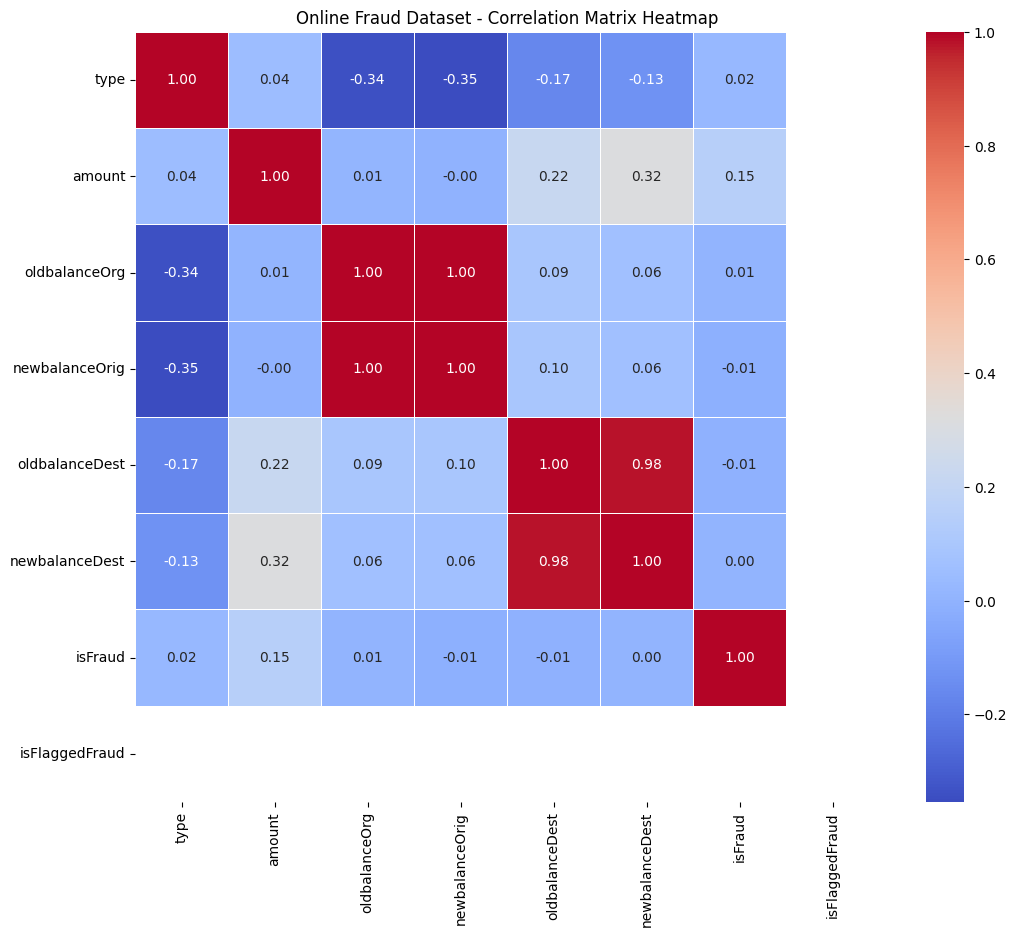

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#features for analysis
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                      'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Extract the selected features from the dataset
selected_df = dataset[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set labels and title
plt.title('Online Fraud Dataset - Correlation Matrix Heatmap')

# Show the plot
plt.show()


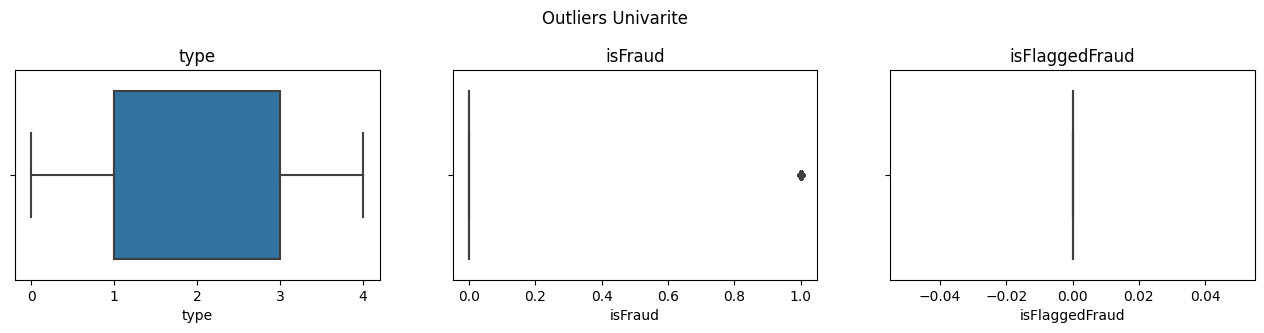

In [ ]:
# Outliers ckeck

plt.rcParams['figure.figsize'] = (16,6)
plt.subplot(2,3,1)
sns.boxplot(data=dataset, x='type')
plt.title('type')

plt.subplot(2,3,2)
sns.boxplot(data=dataset, x='isFraud')
plt.title('isFraud')

plt.subplot(2,3,3)
sns.boxplot(data=dataset, x='isFlaggedFraud')
plt.title('isFlaggedFraud')

plt.suptitle("Outliers Univarite")
plt.show()

In [ ]:
#Removing outliers
dataset['isFraud'].values[dataset['isFraud'].values>1] = 1

In [29]:
# create a new varibale
dataset['encoded'] = le.inverse_transform(dataset['type'])
print(f"Decoded categories: {dataset['type']}")

Decoded categories: 448128    1
849780    3
772203    3
528437    1
951916    1
         ..
564269    1
596531    1
180478    0
405979    0
616918    1
Name: type, Length: 200000, dtype: int64


In [ ]:
#Create dfcol to represent values
dfcol = pd.DataFrame(dataset)
dfcol[['encoded','type']]

,encoded,type
280055,CASH_IN,1
87117,PAYMENT,4
97681,PAYMENT,4
332211,PAYMENT,4
151035,CASH_OUT,2
...,...,...
234496,PAYMENT,4
248193,CASH_IN,1
279882,CASH_OUT,2
280433,PAYMENT,4


In [30]:
# Drop irrevelents values
dataset = dataset.drop(['nameOrig','nameDest','encoded'],axis=1)

In [31]:
# After dropped check if there is any missing values
x = dataset.isnull().sum()
y = (dataset.isnull().sum()/dataset.shape[0])*100
z = {'Total number of missing values':x,'Percentage of missing values':y}
df = pd.DataFrame(z,columns=['Total number of missing values','Percentage of missing values'])
df.sort_values(by='Percentage of missing values', ascending=True)
print(df)

                Total number of missing values  Percentage of missing values
type                                         0                           0.0
amount                                       0                           0.0
oldbalanceOrg                                0                           0.0
newbalanceOrig                               0                           0.0
oldbalanceDest                               0                           0.0
newbalanceDest                               0                           0.0
isFraud                                      0                           0.0
isFlaggedFraud                               0                           0.0


In [33]:
# Case 1 Predict a transaction whether it is fraudulent or not based on the features, not every transaction fraudulent. To identify this classification model is used
# Divide the dataset in x and y variable
x_values = dataset.drop('isFraud',axis=1)
y_values = dataset['isFraud']

In [34]:
x_values.head

<bound method NDFrame.head of         type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
448128     1  100957.58      512515.84       411558.26       620039.24   
849780     3     485.43           0.00            0.00            0.00   
772203     3    9061.89           0.00            0.00            0.00   
528437     1   96446.25        4712.81            0.00       569531.14   
951916     1  170442.28           0.00            0.00      1634556.36   
...      ...        ...            ...             ...             ...   
564269     1  215520.27       31398.00            0.00       428003.56   
596531     1   13831.11        5189.00            0.00            0.00   
180478     0  332010.88      420969.90       752980.78        78276.00   
405979     0   87754.92       90041.00       177795.92            0.00   
616918     1  296300.65           0.00            0.00      1284563.26   

        newbalanceDest  isFlaggedFraud  
448128       720996.82             0.0  

In [ ]:
y_values

280055    0.0
87117     0.0
97681     0.0
332211    0.0
151035    0.0
         ... 
234496    0.0
248193    0.0
279882    0.0
280433    0.0
15182     0.0
Name: isFraud, Length: 200000, dtype: float64

Enter the end value of K starting from 1 to your input value = 15
[0.9986666666666668, 0.9990249999999999, 0.998975, 0.9990500000000001, 0.9990333333333334, 0.9990249999999999, 0.9990583333333334, 0.9990249999999999, 0.9990833333333334, 0.9990333333333334, 0.9990583333333334, 0.9989999999999999, 0.9990333333333334, 0.9989833333333333]


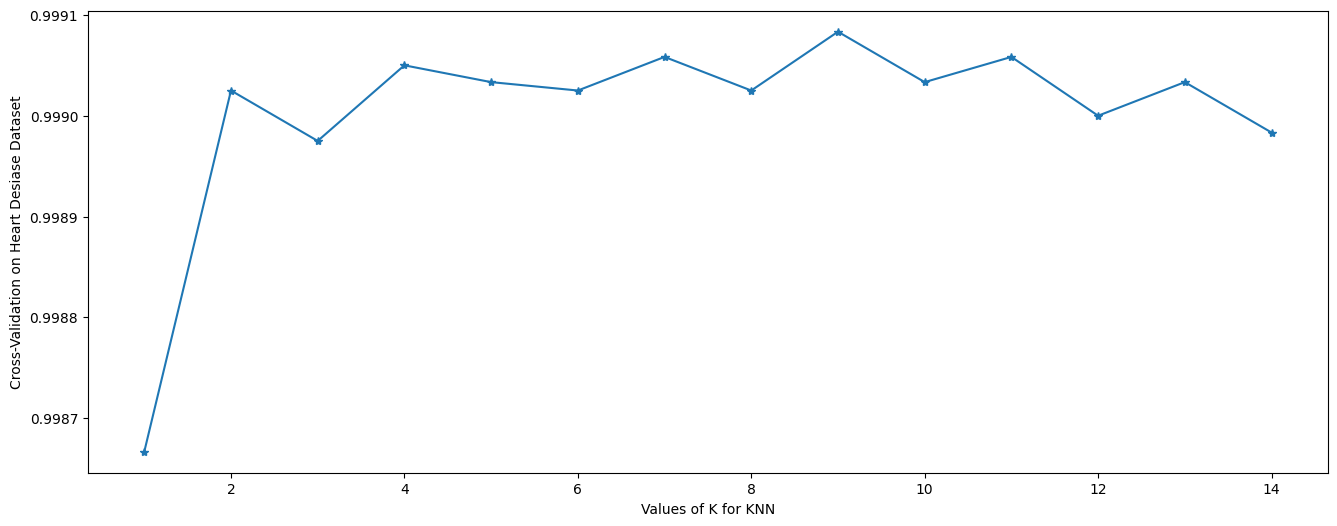

None 9
99.91375000000001
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79954
         1.0       0.40      0.98      0.57        46

    accuracy                           1.00     80000
   macro avg       0.70      0.99      0.78     80000
weighted avg       1.00      1.00      1.00     80000



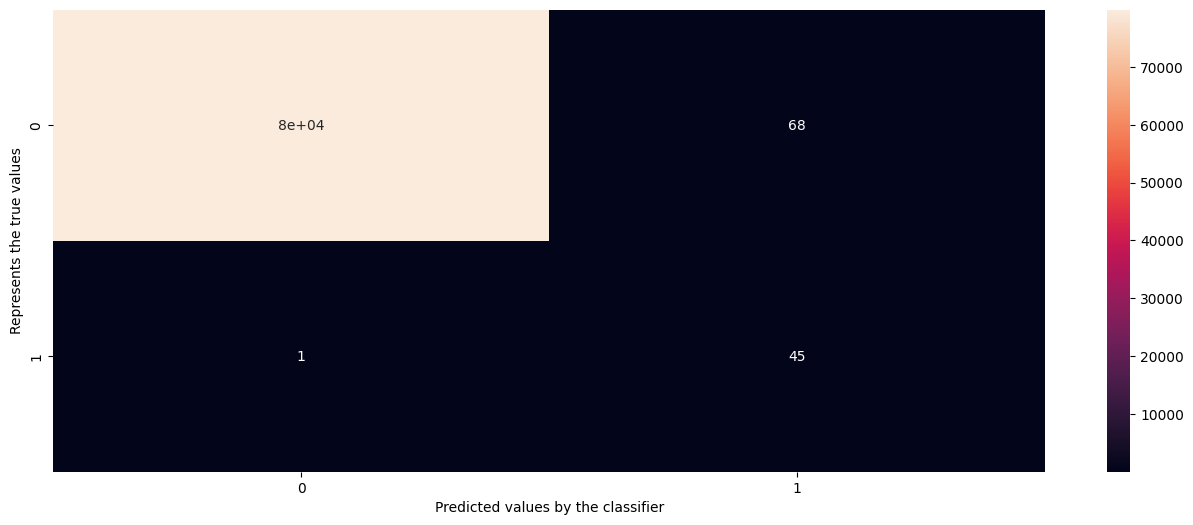

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values, test_size=0.4, random_state=1)

#create a list which store the avg score of cross-validation for each values of K

avg_knn_scroe =[]

# know taking value of take k starting from 1 to user  values

user_input_k = int(input("Enter the end value of K starting from 1 to your input value = "))
knn_values_list = list(range(1,user_input_k))

for i in knn_values_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    scroes_knn = cross_val_score(knn,x_train,y_train, cv=10, scoring='accuracy')
    avg_knn_scroe.append(scroes_knn.mean())
print(avg_knn_scroe)

plt.rcParams['figure.figsize']=(16,6)
plt.plot(knn_values_list, avg_knn_scroe,marker='*')
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-Validation on Heart Desiase Dataset')
best_k = knn_values_list[avg_knn_scroe.index(max(avg_knn_scroe))]
plt.show(),best_k
print(plt.show(),best_k)

knn.fit(x_train,y_train)
y_pred=knn.predict((x_test))

#confuse matrix
cn = confusion_matrix(y_pred,y_test)
sns.heatmap(cn, annot=True)
plt.xlabel('Predicted values by the classifier')
plt.ylabel('Represents the true values')

print(accuracy_score(y_pred, y_test)*100)
print(classification_report(y_pred,y_test))

In [ ]:
# Case 2 K-means Clustering Clustering: Group transactions into clusters based on their transaction characteristics such as amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest as features that will help on to check whether a person received Flagged Fraud or not.
x_k = dataset.iloc[:,:-1]
y_k = dataset.iloc[:,-1]

In [ ]:
y_k.head

<bound method NDFrame.head of 3737323    0
264914     0
85647      0
5899326    0
2544263    0
          ..
3436173    0
5545912    0
5655290    0
3763433    0
3794351    0
Name: isFlaggedFraud, Length: 20000, dtype: int64>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[3.391778851690463e+18, 1.8972224734571863e+18, 1.1233582744120481e+18, 7.733231410043238e+17, 5.4502730299803155e+17, 4.453883560253674e+17, 3.603291398067825e+17, 3.094530722180832e+17, 2.6801827740150976e+17, 2.4096252300108614e+17]


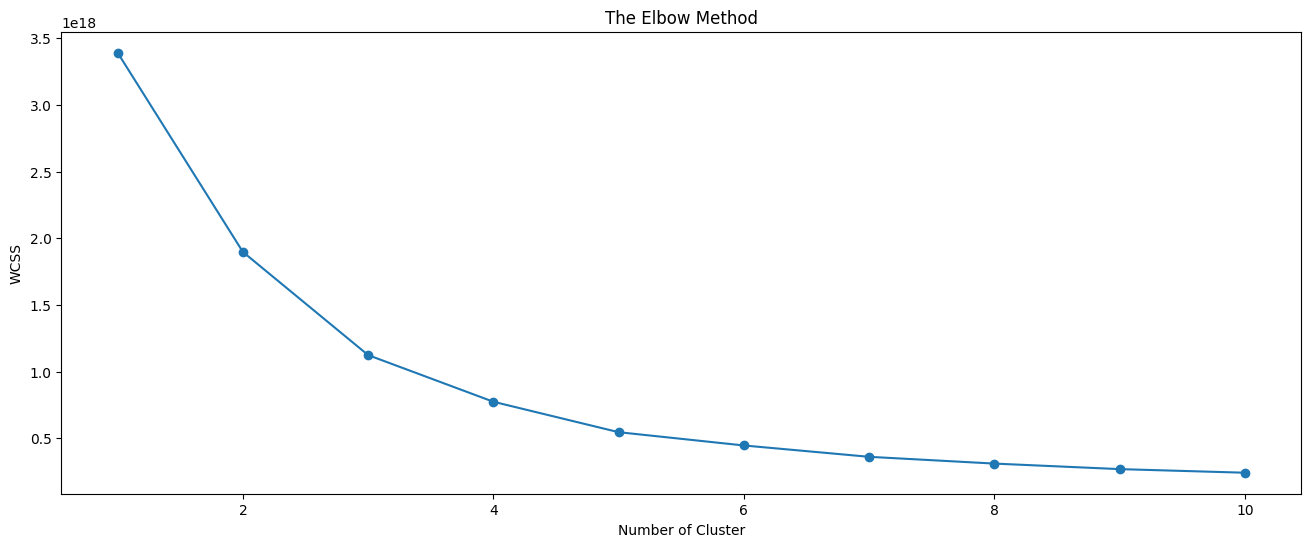

In [63]:
#creating clustering model to check the stable values of K
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmean.fit(x_train)
  wcss.append(kmean.inertia_)
print(wcss)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeansdata = dataset.drop('isFraud',axis=1)


In [43]:
# Check missing values after dropped isFraud column
x = kmeansdata.isnull().sum()
y = (kmeansdata.isnull().sum()/kmeansdata.shape[0])*100
z = {'Total number of missing values':x,'Percentage of missing values':y}
df = pd.DataFrame(z,columns=['Total number of missing values','Percentage of missing values'])
df.sort_values(by='Percentage of missing values', ascending=True)
print(df)

                Total number of missing values  Percentage of missing values
type                                         0                           0.0
amount                                       0                           0.0
oldbalanceOrg                                0                           0.0
newbalanceOrig                               0                           0.0
oldbalanceDest                               0                           0.0
newbalanceDest                               0                           0.0
isFlaggedFraud                               0                           0.0


In [57]:
# Divide the dataset for clustering
x_kmeans = kmeansdata.iloc[:,[3,4,5,6]].values
y_kmeans = kmeansdata.iloc[:,-1].values
y_kmeans

(200000,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_kmeans,y_kmeans, test_size=0.4, random_state=1)

In [61]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(x_kmeans)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


99.91375000000001
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79954
         1.0       0.40      0.98      0.57        46

    accuracy                           1.00     80000
   macro avg       0.70      0.99      0.78     80000
weighted avg       1.00      1.00      1.00     80000



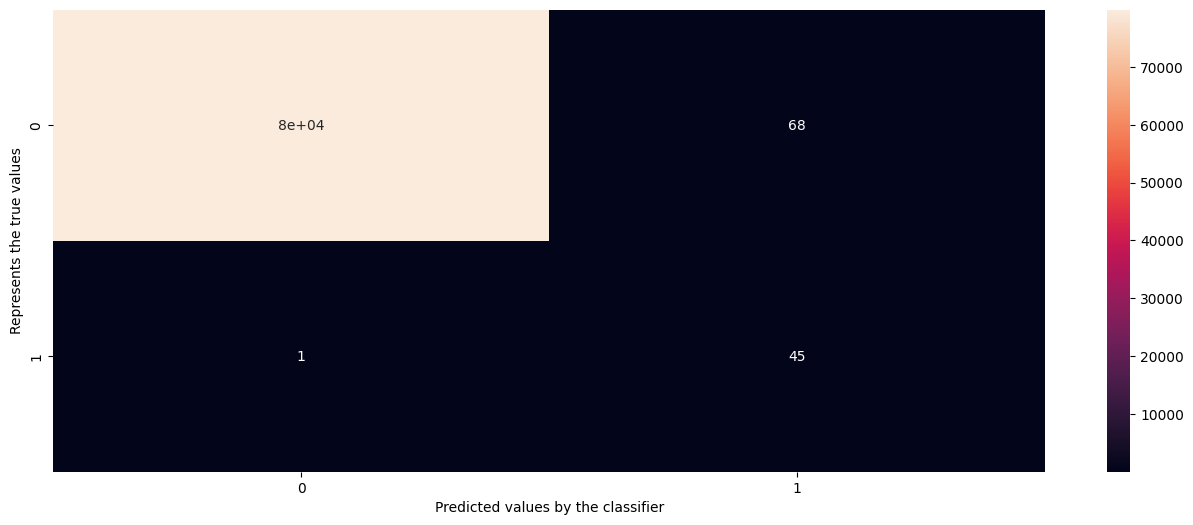

In [62]:
kmeans.fit(x_train,y_train)
y_pred=knn.predict((x_test))

#confuse matrix
cn = confusion_matrix(y_pred,y_test)
sns.heatmap(cn, annot=True)
plt.xlabel('Predicted values by the classifier')
plt.ylabel('Represents the true values')

print(accuracy_score(y_pred, y_test)*100)
print(classification_report(y_pred,y_test))

In [ ]:
print(y_kmeans)

[1 1 1 ... 1 1 1]


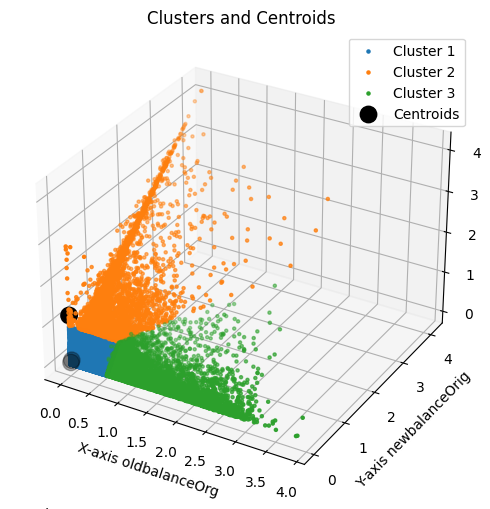

In [64]:
# x_kmeans and y_kmeans are your data and cluster labels, and kmeans in Fraud KMeans model

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in np.unique(y_kmeans):
    ax.scatter(x_kmeans[y_kmeans == cluster_label, 0],
               x_kmeans[y_kmeans == cluster_label, 1],
               x_kmeans[y_kmeans == cluster_label, 2],
               s=5, label=f'Cluster {cluster_label + 1}')

# Scatter plot for cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=140, c='black', marker='o', label='Centroids')

# Set labels and title
ax.set_xlabel('X-axis oldbalanceOrg')
ax.set_ylabel('Y-axis newbalanceOrig')
ax.set_zlabel('Z-axis isFlaggedFraud')
ax.set_title('Clusters and Centroids')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your data and 'kmeans.labels_' are your cluster labels from K-means
silhouette_avg = silhouette_score(x_kmeans, kmeans.labels_)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.8246120052379587


In [ ]:
# Case 3 Calculate the time difference between the current transaction and the previous transaction for each account. This new variable could be valuable because fraudulent activities might be associated with sudden changes in transaction patterns or unusual gaps between transactions.


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     79893
         1.0       1.00      0.02      0.04       107

    accuracy                           1.00     80000
   macro avg       1.00      0.51      0.52     80000
weighted avg       1.00      1.00      1.00     80000

Accuracy: 1.00
Mean Squared Error: 0.001228135233587811


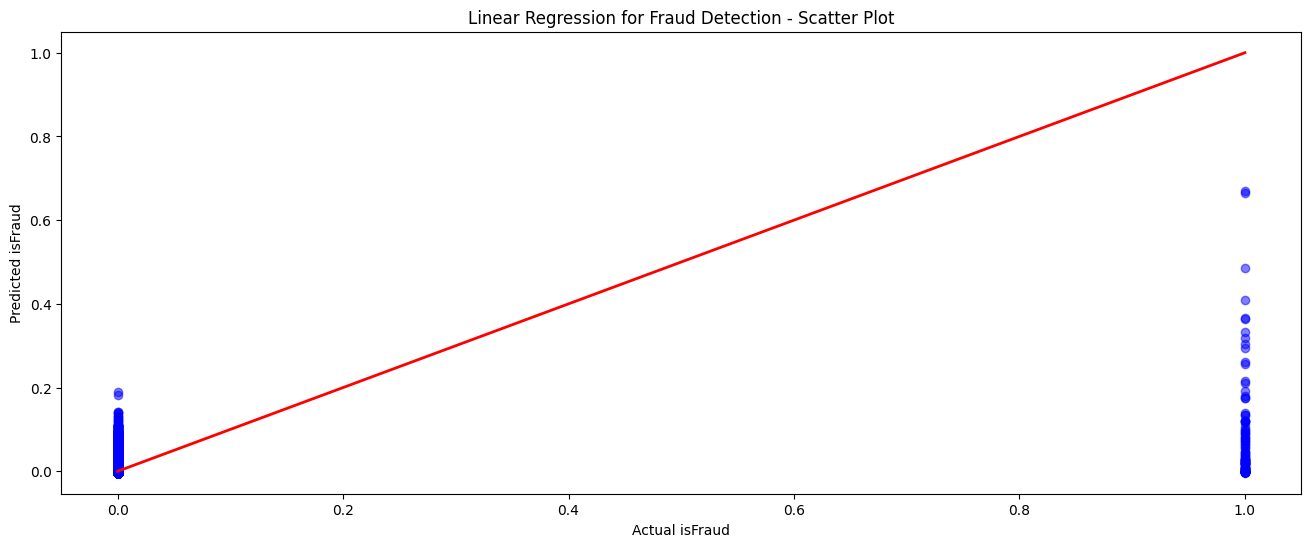

In [82]:

# Create a new variable representing the difference between 'amount' and 'newbalanceOrig'
dataset['amount_newbalance_diff'] = dataset['amount'] - dataset['newbalanceOrig']

# Select features for the model
features = [ 'oldbalanceOrg','amount_newbalance_diff']

# X contains the features, y contains the target variable (isFraud)
X = dataset[features]
y = dataset['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted values to binary labels (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Display the classification report
classification_rep = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", classification_rep)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle='-', color='red', linewidth=2)  # Diagonal line for reference
plt.xlabel('Actual isFraud')
plt.ylabel('Predicted isFraud')
plt.title('Linear Regression for Fraud Detection - Scatter Plot')
plt.show()
